## Observations and Insights 

In [1]:
# kmr Pymaceuticals Matplotlib Challenge 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Look at datasets for understanding
#print(mouse_metadata)
#print(study_results)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
#combined.head(20)
print(len(combined))

# Display the data table for preview
combined.head(20)

1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mousecount = combined['Mouse ID'].unique()
print(len(mousecount))

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duphunter = combined.groupby(["Mouse ID"]).count()["Timepoint"]
duptable = pd.DataFrame({"Number of Timepoints": duphunter}).sort_values(["Number of Timepoints"], ascending=False)
duptable.head(5)

,Number of Timepoints
Mouse ID,
g989,13
a203,10
n364,10
m546,10
m550,10


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseindex = combined.set_index("Mouse ID")
#mouseindex.head()
mouse989 = mouseindex.loc["g989"]
mouse989.head(20)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduped = mouseindex.drop(["g989"])
deduped.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(deduped))


#cleancount = combined.drop_duplicates("Mouse ID")
#cleancount.unique()
#print(len(deduped).unique)
#print(len[deduped["Mouse ID"]])
#deduped.unique()
#print(deduped).unique()
#mousecounttwo = deduped["Mouse ID"].unique()
#mousecounttwo = deduped['Mouse ID'].unique()
#mousecounttwo = deduped(["Mouse ID"]).unique()
#mousecounttwo = deduped(['Mouse ID']).unique()
#mousecounttwo = deduped(deduped['Mouse ID']).unique()
#print(len(mousecounttwo))
#print(mousecounttwo)

1880


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_df = deduped.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Tumor Mean")
#mean_df.head(11)
median_df = deduped.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Tumor Median")
#median_df.head(11)
variance_df = deduped.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Tumor Variance")
#variance_df.head(11)
deviation_df = deduped.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Tumor Std Dev")
#deviation_df.head(11)
sem_df = deduped.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("Tumor Std Error")
#sem_df.head(11)

# Build a dataframe to present a consolidated table
summary_df = pd.DataFrame({"Tumor Mean": mean_df, "Tumor Median": median_df,"Tumor Variance": variance_df,"Tumor Std Dev": deviation_df,"Tumor Std Error": sem_df})
summary_df                          
                           
# Format the dataframe for a more friendly presentation
#spend_df["Total Purchase Value"] = spend_df["Total Purchase Value"].map("${:.2f}".format)
#spend_df["Average Purchase Price"] = spend_df["Average Purchase Price"].map("${:.2f}".format)
#spend_df.head(12)

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

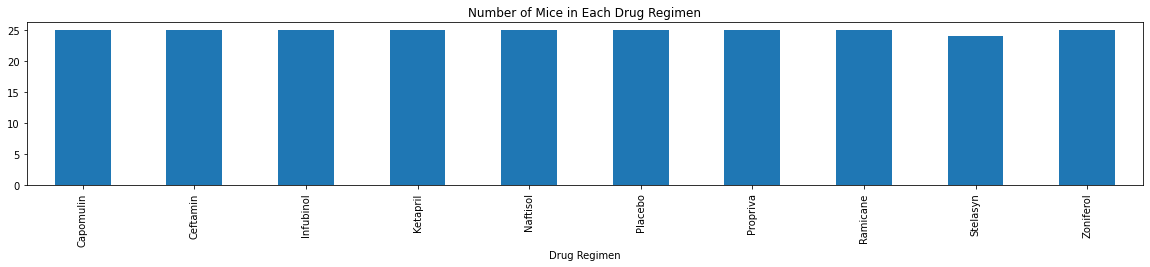

<Figure size 432x288 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Filter the DataFrame down only to those columns and rows desired for the chart
#deduped.head()
organizedthree = organizedtwo.groupby(["Drug Regimen"]).count()["Mouse ID"]
#organizedthree.head(15)
organized = combined[["Mouse ID", "Drug Regimen"]]
#organized.head()
organizedtwo = organized.drop_duplicates("Mouse ID")
#organizedtwo.head()
organizedthree = organizedtwo.groupby(["Drug Regimen"]).count()["Mouse ID"]
#organizedthree.head(15)

# Use DataFrame.plot() in order to create a bar chart of the data
organizedthree.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Number of Mice in Each Drug Regimen")

# Present the chart in desired format
plt.show()
plt.tight_layout()

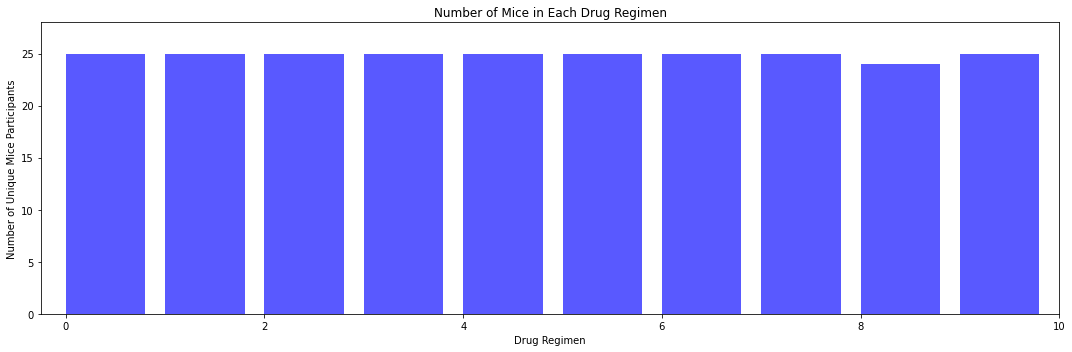

In [32]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#deduped.head()
organized = combined[["Mouse ID", "Drug Regimen"]]
#organized.head()
organizedtwo = organized.drop_duplicates("Mouse ID")
#organizedtwo.head()
organizedthree = organizedtwo.groupby(["Drug Regimen"]).count()["Mouse ID"]
#organizedthree.head(15)

x_axis = np.arange(len(organizedthree))
#print(x_axis)
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(15,5))
plt.bar(x_axis, organizedthree, color='b', alpha=0.65, align="edge")
#plt.xticks(tick_locations)
#organizedfour = organizedtwo.unique("Drug Regimen")
#plt.xticks(tick_locations, organizedfour["Drug Regimen"], rotation="vertical")
#plt.xticks(tick_locations, organizedthree["Drug Regimen"], rotation="vertical")
#plt.xticks(tick_locations, organizedthree(["Drug Regimen"]), rotation="vertical")
#plt.xticks(tick_locations, organizedthree, rotation="vertical")
#plt.xticks(tick_locations, labels, rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(organizedthree)+3)
plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Participants")
plt.tight_layout()
#plt.savefig("../Images/avg_state_rain.png")
plt.show()


In [101]:
# Generate a data frame showing the distribution of female versus male mice
gender = combined[["Mouse ID", "Sex"]]
#gender.head()
gendertwo = gender.drop_duplicates("Mouse ID")
#gendertwo.head()
genderthree = gendertwo.groupby(["Sex"]).count()["Mouse ID"]
genderthree.head(3)

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

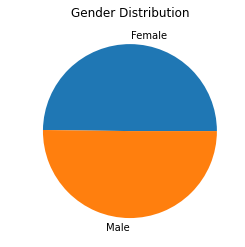

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

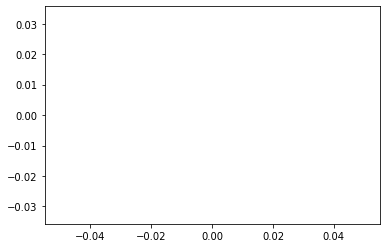

In [39]:
# Create a pie chart showing the distribution of female versus male mice using pandas
pie = genderthree.plot(kind="pie", y='Sex', title=("Gender Distribution"))
pie.set_ylabel(" ")
plt.show()
plt.axis("equal")

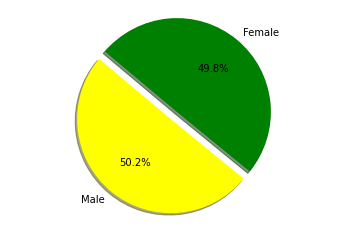

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#slice = genderthree.loc(genderthree["Sex"])
#slice = genderthree.loc(genderthree(["Sex"])
slice2 = ["Male", "Female"]
#share = genderthree.loc["Sex"].count()
#share2 = genderthree.set_index("Sex")
share2 = [125,124]
colors = ["yellow","green"]
explode = (0.1,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(share2, explode=explode, labels=slice2, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()



## Quartiles, Outliers and Boxplots

In [86]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

comboindex = combined.set_index("Drug Regimen")
#comboindex.head()
capomulin = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Ceftamin").drop("Infubinol").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Ramicane").drop("Stelasyn").drop("Zoniferol")
#capomulin.head(30)
ceftamin = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Capomulin").drop("Infubinol").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Ramicane").drop("Stelasyn").drop("Zoniferol")
#ceftamin.head(30)
infubinol = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Capomulin").drop("Ceftamin").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Ramicane").drop("Stelasyn").drop("Zoniferol")
#infubinol.head(30)
ramicane = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Ceftamin").drop("Infubinol").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Capomulin").drop("Stelasyn").drop("Zoniferol")
#ramicane.head(30)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint ... comboindex achieves this goal, no?
#? ... unclear why instructions request a "merge"
combofocus = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Stelasyn").drop("Zoniferol")
combofocus.head(30)


Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  \
Drug Regimen Mouse ID                                                          
Capomulin    b128               9          22         45           45.651331   
             b742               7          21         45           45.000000   
             f966              16          17         20           45.000000   
             g288               3          19         45           46.304003   
             g316              22          22         45           46.809225   
             i557               1          24         45           47.685963   
             i738              23          20         45           45.595685   
             j119               7          23         45           48.158209   
             j246              21          21         35           46.408361   
             l509              17          21         45           48.070452   
             l897              17          19         45           46.154737   
             m601              22          17         45           45.000000   
             m957               3          19         45           46.414518   
             r157              22          25         15           46.539206   
             r554               8          17         45           45.781746   
             r944              12          25         45           47.373423   
             s185               3          17         45           45.000000   
             s710               1          23         45           45.000000   
             t565              20          17         45           46.749006   
             u364              18          17         45           47.212200   
             v923              19          21         45           45.704434   
             w150              23          23         10           45.000000   
             w914              24          21         45           45.893720   
             x401              16          15         45           45.473753   
             y793              17          17         45           45.000000   
Ceftamin     a275              20          28         45           62.999356   
             b447               2          30          0           45.000000   
             b487               6          28         25           56.057749   
             b759              12          25         30           55.742829   
             f436               3          25         15           48.722078   

                       Metastatic Sites  
Drug Regimen Mouse ID                    
Capomulin    b128                     2  
             b742                     0  
             f966                     0  
             g288                     1  
             g316                     2  
             i557                     1  
             i738                     2  
             j119                     1  
             j246                     1  
             l509                     3  
             l897                     1  
             m601                     1  
             m957                     1  
             r157                     0  
             r554                     3  
             r944                     2  
             s185                     1  
             s710                     1  
             t565                     0  
             u364                     3  
             v923                     2  
             w150                     0  
             w914                     2  
             x401                     0  
             y793                     2  
Ceftamin     a275                     3  
             b447                     0  
             b487                     1  
             b759                     1  
             f436                     2

In [98]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
#capomulintumors = []

# Loop dataframe to fill list
#for regimen in latest:
#    if regimen == "Capomulin":
#       capomulintumors.append(regimen[4])
        
#print(capomulintumors)

#csvpath = latest
#with open(csvpath) as csvfile:
#    csvreader = csv.reader(csvfile, delimiter=',')
#    csvheader = next(csvreader)

#namelist = []
#    for candidatexx in csvreader:
#        if not candidatexx[2] in namelist: 
#            namelist.append(candidatexx[2])


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
ramicane.count()
    

Age_months            25
Weight (g)            25
Timepoint             25
Tumor Volume (mm3)    25
Metastatic Sites      25
dtype: int64

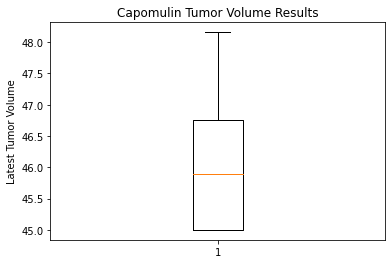

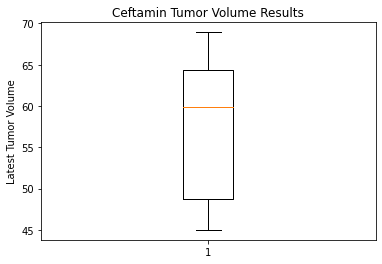

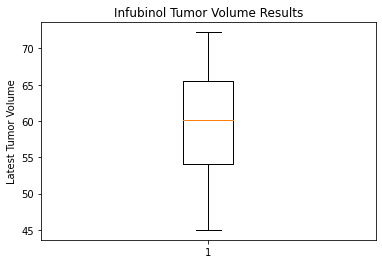

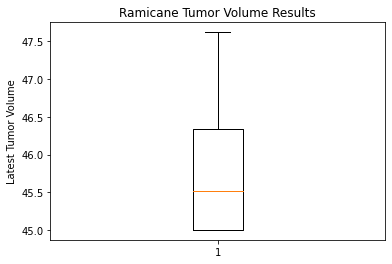

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug1 = capomulin["Tumor Volume (mm3)"]
drug2 = ceftamin["Tumor Volume (mm3)"]
drug3 = infubinol["Tumor Volume (mm3)"]
drug4 = ramicane["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Tumor Volume Results')
ax1.set_ylabel('Latest Tumor Volume')
ax1.boxplot(drug1)

fig2, ax1 = plt.subplots()
ax1.set_title('Ceftamin Tumor Volume Results')
ax1.set_ylabel('Latest Tumor Volume')
ax1.boxplot(drug2)

fig3, ax1 = plt.subplots()
ax1.set_title('Infubinol Tumor Volume Results')
ax1.set_ylabel('Latest Tumor Volume')
ax1.boxplot(drug3)

fig4, ax1 = plt.subplots()
ax1.set_title('Ramicane Tumor Volume Results')
ax1.set_ylabel('Latest Tumor Volume')
ax1.boxplot(drug4)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
